<a href="https://colab.research.google.com/github/Visionaryofthefuture/Machine-Learning/blob/main/Polynomialregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [76]:
file = "/content/Position_Salaries.csv"

In [78]:
df= pd.DataFrame(pd.read_csv(file))

In [79]:
print(df.shape)
print()
print(f" the columns are : {df.columns}")
print()
print(df.info())
print()
df.head()

(10, 3)

 the columns are : Index(['Position', 'Level', 'Salary'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None



,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [81]:
X = df.iloc[:, 1:-1] # since level was encoding for positions
Y = df.iloc[:, -1]
X


,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [82]:
Y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [83]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size = 0.3)
print(df["Position"].nunique)

<bound method IndexOpsMixin.nunique of 0     Business Analyst
1    Junior Consultant
2    Senior Consultant
3              Manager
4      Country Manager
5       Region Manager
6              Partner
7       Senior Partner
8              C-level
9                  CEO
Name: Position, dtype: object>


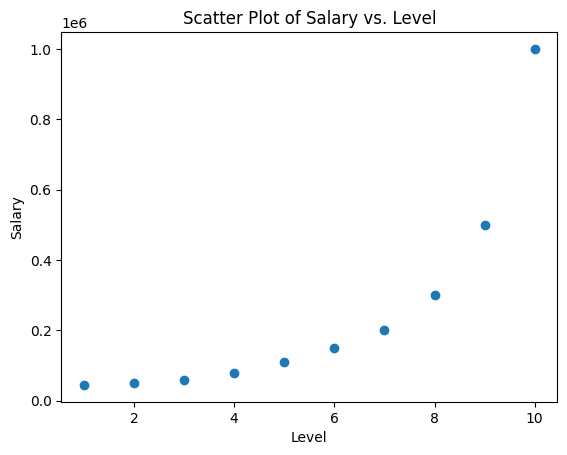

In [104]:
plt.scatter(df['Level'], Y)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Scatter Plot of Salary vs. Level")
plt.show()


Above indicates a parabola fit, degree 2 fit more than a simple
linear regression fit


In [85]:
from sklearn.linear_model import LinearRegression

In [110]:
linear = LinearRegression()
linear.fit(X,Y)


LinearRegression()

In [111]:
k = linear.predict(X_train)

In [88]:


# Concatenate the arrays along the last axis
concatenated_array = np.concatenate((Y_train, k), axis=-1)

# Print the concatenated array
print(concatenated_array)

[  45000.          300000.          110000.         1000000.
  500000.           80000.          200000.         -114454.54545455
  451696.96969697  209060.60606061  613454.54545455  532575.75757576
  128181.81818182  370818.18181818]


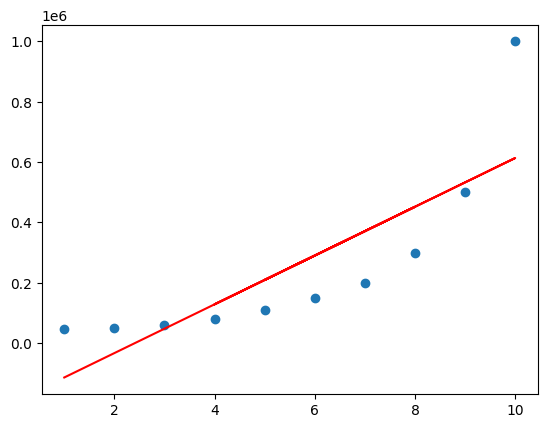

In [112]:
plt.scatter(df["Level"], df["Salary"])
plt.plot(X_train, linear.predict(X_train), color = "red")

Above demonstrated why linear regression isnt the best fit for the task


In [90]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
reg_2 = linear.fit(X_poly, Y_train)

Text(0, 0.5, 'Salary (in million $)')

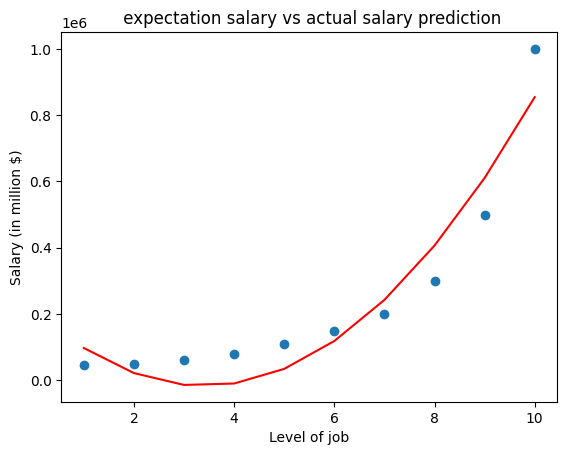

In [98]:
plt.scatter(df["Level"], df["Salary"])
plt.plot(X, reg_2.predict(poly_reg.fit_transform(X)), color = "red")
plt.title(" expectation salary vs actual salary prediction")
plt.xlabel("Level of job")
plt.ylabel("Salary (in million $)")

Above plot demonstrates the need for polynomial regression over linear depending on the data and scatter plot of it
